In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import layers
import glob
import pickle 

import cv2
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from pathlib import Path
import seaborn as sb
sb.set()
from tensorflow.keras import layers
from keras import regularizers

Using TensorFlow backend.


In [2]:
datadir=Path("flowers")

flowers = []
features = []
labels = []
for dir in datadir.iterdir():
    flowers.append(dir.name)
    print(dir.name)
    for img_path in dir.iterdir():
        if img_path.name.endswith("jpg"):
            labels.append(dir.name)
            img_arr = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (240,240))
            features.append(img_arr)

daisy
dandelion
rose
sunflower
tulip


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


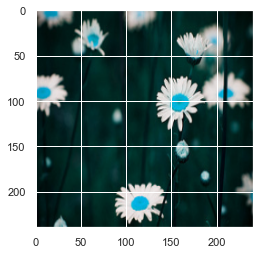

In [4]:
plt.imshow(features[500])
plt.show()

In [5]:
features = np.array(features)
labels = np.array(labels)
np.savez_compressed("flower_data", features, labels)

In [6]:
labels

array(['daisy', 'daisy', 'daisy', ..., 'tulip', 'tulip', 'tulip'],
      dtype='<U9')

In [7]:
features

array([[[[133, 135, 135],
         [139, 140, 140],
         [144, 144, 144],
         ...,
         [152, 154, 154],
         [154, 154, 154],
         [149, 149, 149]],

        [[132, 134, 134],
         [137, 139, 139],
         [143, 143, 143],
         ...,
         [152, 153, 153],
         [154, 154, 154],
         [149, 149, 149]],

        [[131, 133, 133],
         [136, 138, 138],
         [142, 143, 143],
         ...,
         [151, 153, 153],
         [153, 153, 153],
         [147, 147, 147]],

        ...,

        [[ 26,  48,  45],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [125, 126, 130],
         [125, 126, 130],
         [124, 125, 129]],

        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [126, 127, 131],
         [125, 126, 130],
         [125, 126, 130]],

        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [127, 128, 132],
        

In [8]:
def prep(features, labels):
    features=features.reshape(len(features), 240,240,3)/255.0
    one_hot=LabelBinarizer()
    labels=one_hot.fit_transform(labels)
    return features, labels, one_hot

In [9]:
features.shape

(4261, 240, 240, 3)

In [10]:
x,y,one_hot=prep(features, labels)
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)

In [15]:
x_train.size

441676800

In [16]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.3
Scikit-Learn 0.24.1
GPU is available


In [33]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5),activation ='relu', input_shape = (240,240,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),kernel_regularizer=regularizers.l2(0.001),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =64, kernel_size = (5,5),activation ='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.5))
model.add(Conv2D(filters = 96, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (5,5),kernel_regularizer=regularizers.l2(0.001),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (5,5),kernel_regularizer=regularizers.l2(0.001),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.5))
model.add(Conv2D(filters = 128, kernel_size = (5,5),kernel_regularizer=regularizers.l2(0.003),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(Dense(5, activation = "softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])


In [34]:
training_model = model.fit(x_train, y_train, epochs=55, batch_size=35)

Train on 2556 samples
Epoch 1/55
2556/2556 [==============================] - 16s 6ms/sample - loss: 2.2168 - accuracy: 0.3009
Epoch 2/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.9347 - accuracy: 0.3709
Epoch 3/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.7382 - accuracy: 0.4487
Epoch 4/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.6308 - accuracy: 0.4765
Epoch 5/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.5167 - accuracy: 0.5278
Epoch 6/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.4580 - accuracy: 0.5505
Epoch 7/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.3657 - accuracy: 0.5567
Epoch 8/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.2735 - accuracy: 0.5884
Epoch 9/55
2556/2556 [==============================] - 14s 5ms/sample - loss: 1.2198 - accuracy: 0.6189
Epoch 10/55
2556/2556 [==========

In [35]:
model.save("flowermodel.h5")

In [36]:

def plot_accuracy(training_model):
    plt.figure(figsize=(10,5))
    plt.plot(training_model.history["accuracy"], label="Accuracy", color = "g")
    plt.plot(training_model.history["loss"], label = "Loss", color = "b")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

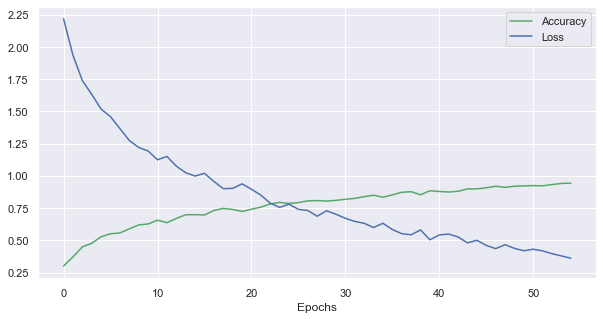

In [37]:
plot_accuracy(training_model)

In [38]:
model=tf.keras.models.load_model("flowermodel.h5")

In [39]:
model.evaluate(x_test,y_test)

1705/1705 [==============================] - 4s 2ms/sample - loss: 1.5535 - accuracy: 0.7032


[1.553547266012063, 0.7032258]